<a href="https://colab.research.google.com/github/Noob919/COVID_19-XRAY-Classification/blob/main/pristine_pet_dtg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
df =  pd.read_csv("/content/PRISTINE PET MP.csv")
df.columns

Index(['time', 'tem', 'heating rate', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [3]:
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 3':"Weight loss", 'Unnamed: 4':"DTG",'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)

,time,tem,heating rate,Weight loss,DTG,label
4050,67.48333333,967.66,14.33924426,56.454816,-0.013943,Validation
4051,67.5,967.85,14.33851852,56.454816,-0.013939,Training
4052,67.51666667,967.97,14.33675636,56.454816,-0.013936,Training
4053,67.53333333,968.2,14.33662389,56.454816,-0.013933,Training
4054,67.55,968.41,14.33619541,56.454816,-0.013929,Training


In [4]:
df_res =  df_na[['time', 'tem', 'heating rate', 'DTG']]
df_res.tail(3)

,time,tem,heating rate,DTG
4052,67.51666667,967.97,14.33675636,-0.013936
4053,67.53333333,968.2,14.33662389,-0.013933
4054,67.55,968.41,14.33619541,-0.013929


In [5]:
label = df_na['label']
label = label.reset_index()
label

,index,label
0,1,Training
1,2,Training
2,3,Validation
3,4,Training
4,5,Test
...,...,...
4049,4050,Validation
4050,4051,Training
4051,4052,Training
4052,4053,Training


In [6]:
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

In [7]:
transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG']
transform_df

,time,tem,heating rate,DTG
0,0.000000e+00,1.000000,0.000000,2.716720e-06
1,9.117264e-07,0.016664,0.999861,4.526940e-08
2,3.645746e-06,0.033315,0.999445,9.051003e-08
3,8.196169e-06,0.049938,0.998752,1.356531e-07
4,1.455733e-05,0.066519,0.997785,1.807016e-07
...,...,...,...,...
4049,6.956211e-02,0.997468,0.014781,-1.437241e-05
4050,6.956562e-02,0.997468,0.014777,-1.436603e-05
4051,6.957413e-02,0.997467,0.014774,-1.436070e-05
4052,6.957478e-02,0.997467,0.014770,-1.435374e-05


In [8]:
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,DTG,index,label
0,0.000000e+00,1.000000,0.000000,2.716720e-06,1,Training
1,9.117264e-07,0.016664,0.999861,4.526940e-08,2,Training
2,3.645746e-06,0.033315,0.999445,9.051003e-08,3,Validation
3,8.196169e-06,0.049938,0.998752,1.356531e-07,4,Training
4,1.455733e-05,0.066519,0.997785,1.807016e-07,5,Test
...,...,...,...,...,...,...
4049,6.956211e-02,0.997468,0.014781,-1.437241e-05,4050,Validation
4050,6.956562e-02,0.997468,0.014777,-1.436603e-05,4051,Training
4051,6.957413e-02,0.997467,0.014774,-1.436070e-05,4052,Training
4052,6.957478e-02,0.997467,0.014770,-1.435374e-05,4053,Training


In [9]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']

In [10]:
from sklearn.tree import DecisionTreeRegressor
DTCLF = DecisionTreeRegressor()
DTCLF.fit(X,y)

DecisionTreeRegressor()

In [11]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']
predictions_val = DTCLF.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val

,0
0,1.356531e-07
1,7.777075e-07
2,0.000000e+00
3,1.297821e-06
4,1.586106e-06
...,...
400,-8.581784e-07
401,-8.581784e-07
402,-1.445922e-05
403,-1.442863e-05


In [12]:
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 7.214011760278244e-12
RMSE 2.6858912413346605e-06
MAE 3.810419485142679e-07
R2_Score 0.9941924259389082


In [13]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)

In [14]:
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000004,0.033315,0.999445,1.356531e-07,9.051003e-08
1,0.000313,0.301892,0.953342,7.777075e-07,8.167232e-07
2,0.000523,0.384615,0.923077,0.000000e+00,0.000000e+00


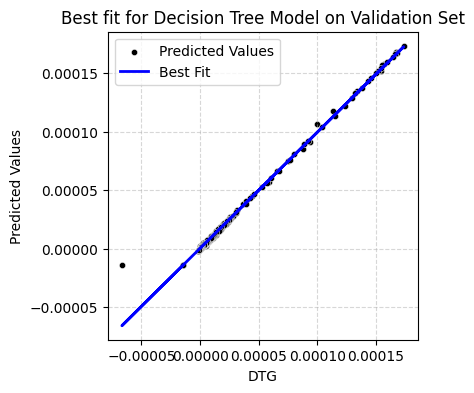

In [17]:
x = final_df['DTG']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='blue', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Decision Tree Model on Validation Set')
plt.xlabel('DTG')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [18]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']

In [19]:
predictions_test = DTCLF.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,1.356531e-07
1,6.570463e-07
2,0.000000e+00
3,1.424951e-06
4,1.630721e-06
...,...
401,-8.581784e-07
402,-8.581784e-07
403,-8.581784e-07
404,-1.438974e-05


In [20]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 2.2816432862020147e-13
RMSE 4.776654986705671e-07
MAE 1.6876139523717332e-07
R2_Score 0.9998168590262108


In [21]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
X_test_df

,time,tem,heating rate
0,0.000015,0.066519,0.997785
1,0.000225,0.257663,0.966235
2,0.000485,0.371391,0.928477
3,0.001150,0.544988,0.838443
4,0.001458,0.599999,0.799999
...,...,...,...
401,0.069281,0.997485,0.014929
402,0.069359,0.997481,0.014884
403,0.069380,0.997479,0.014873
404,0.069510,0.997471,0.014810


In [22]:
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000015,0.066519,0.997785,1.356531e-07,1.807016e-07
1,0.000225,0.257663,0.966235,6.570463e-07,6.977295e-07
2,0.000485,0.371391,0.928477,0.000000e+00,0.000000e+00
3,0.001150,0.544988,0.838443,1.424951e-06,1.464476e-06
4,0.001458,0.599999,0.799999,1.630721e-06,1.608853e-06
...,...,...,...,...,...
401,0.069281,0.997485,0.014929,-8.581784e-07,-8.580666e-07
402,0.069359,0.997481,0.014884,-8.581784e-07,-8.564689e-07
403,0.069380,0.997479,0.014873,-8.581784e-07,-8.560859e-07
404,0.069510,0.997471,0.014810,-1.438974e-05,-1.440581e-05


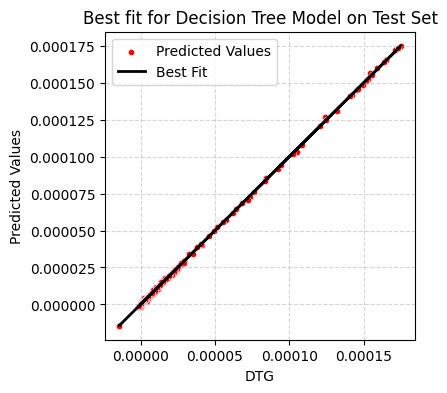

In [25]:
x = final_df_test['DTG']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='red', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='black', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Decision Tree Model on Test Set')
plt.xlabel('DTG')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rfc = RandomForestRegressor()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']


rfc.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']

predictions_val = rfc.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 7.329669498287906e-12
RMSE 2.7073362366517953e-06
MAE 3.484091569340335e-07
R2_Score 0.994099316736768


In [28]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000004,0.033315,0.999445,8.585921e-08,9.051003e-08
1,0.000313,0.301892,0.953342,7.663913e-07,8.167232e-07
2,0.000523,0.384615,0.923077,0.000000e+00,0.000000e+00


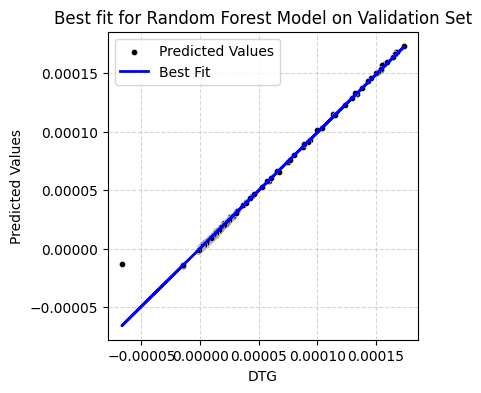

In [30]:
x = final_df['DTG']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='blue', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Random Forest Model on Validation Set')
plt.xlabel('DTG')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [31]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']

predictions_test = rfc.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 1.668082448938228e-13
RMSE 4.0842165086320143e-07
MAE 1.8459109460527954e-07
R2_Score 0.9998661077978724


In [32]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000015,0.066519,0.997785,1.661585e-07,1.807016e-07
1,0.000225,0.257663,0.966235,6.910016e-07,6.977295e-07
2,0.000485,0.371391,0.928477,0.000000e+00,0.000000e+00
3,0.001150,0.544988,0.838443,1.452385e-06,1.464476e-06
4,0.001458,0.599999,0.799999,1.618648e-06,1.608853e-06
...,...,...,...,...,...
401,0.069281,0.997485,0.014929,-8.582113e-07,-8.580666e-07
402,0.069359,0.997481,0.014884,-8.582113e-07,-8.564689e-07
403,0.069380,0.997479,0.014873,-8.582113e-07,-8.560859e-07
404,0.069510,0.997471,0.014810,-1.439839e-05,-1.440581e-05


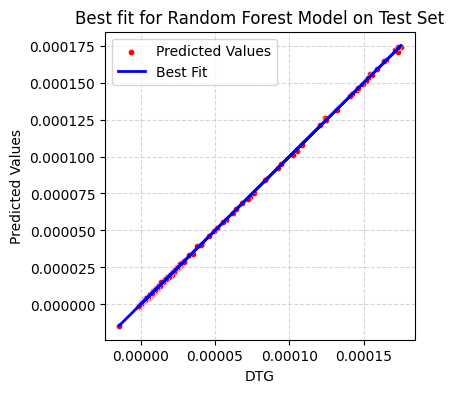

In [35]:
x = final_df_test['DTG']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='red', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='blue', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Random Forest Model on Test Set')
plt.xlabel('DTG')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [36]:
from sklearn.svm import SVR

svr = SVR()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']

svr.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']

predictions_val = svr.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 5.464776061871047e-09
RMSE 7.39241236801022e-05
MAE 7.235772967957072e-05
R2_Score -3.399367891434303


In [37]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000004,0.033315,0.999445,0.00008,9.051003e-08
1,0.000313,0.301892,0.953342,0.00008,8.167232e-07
2,0.000523,0.384615,0.923077,0.00008,0.000000e+00


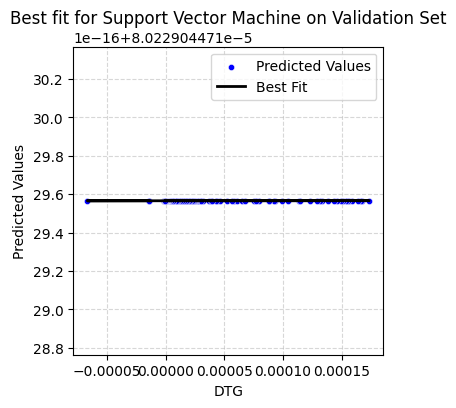

In [39]:
x = final_df['DTG']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='blue', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='black', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Support Vector Machine on Validation Set')
plt.xlabel('DTG')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [40]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']

predictions_test = svr.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 5.439097112954458e-09
RMSE 7.375023466372468e-05
MAE 7.22771707298213e-05
R2_Score -3.3658075205030684


In [41]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000015,0.066519,0.997785,0.00008,1.807016e-07
1,0.000225,0.257663,0.966235,0.00008,6.977295e-07
2,0.000485,0.371391,0.928477,0.00008,0.000000e+00
3,0.001150,0.544988,0.838443,0.00008,1.464476e-06
4,0.001458,0.599999,0.799999,0.00008,1.608853e-06
...,...,...,...,...,...
401,0.069281,0.997485,0.014929,0.00008,-8.580666e-07
402,0.069359,0.997481,0.014884,0.00008,-8.564689e-07
403,0.069380,0.997479,0.014873,0.00008,-8.560859e-07
404,0.069510,0.997471,0.014810,0.00008,-1.440581e-05


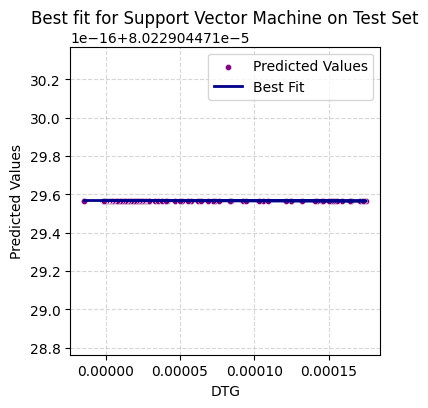

In [42]:
x = final_df_test['DTG']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='purple', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='darkblue', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Support Vector Machine on Test Set')
plt.xlabel('DTG')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()